# HiCOMB Visualizations

Creating figures/plots for the HiCOMB paper

In [1]:
import plotly.express as px
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

from scipy.stats import wilcoxon

sns.set_theme() # default Seaborn theme

In [2]:
cd /Users/may/Projects/data/PSP/HiCOMB/run_sm_genome_r2

/Users/may/Projects/data/PSP/HiCOMB/run_sm_genome_r2


In [3]:
timings = pd.read_csv('1464228_timings.csv')

In [4]:
timings.start_time = pd.to_datetime(timings.start_time, unit='s')

In [5]:
timings.stop_time = pd.to_datetime(timings.stop_time, unit='s')

In [6]:
timings.sort_values(by=['start_time'], inplace=True) 

In [7]:
timings

,hostname,worker_id,start_time,stop_time,target,model
1252,a17n02,Worker-20866550-e6a6-4307-bf82-d4140101bf5c,2021-10-01 02:07:04.402131200,2021-10-01 02:34:24.340150528,Sphm05G108000.1,model_1_ptm
1245,a17n02,Worker-92b42217-2282-44db-a4b2-428f9f0a08fb,2021-10-01 02:07:04.430266880,2021-10-01 02:34:12.834013696,Sphm05G108000.1,model_2_ptm
1197,a17n02,Worker-5968535c-f885-4e59-806a-d8764688577e,2021-10-01 02:07:04.430383360,2021-10-01 02:31:09.145946624,Sphm05G108000.1,model_3_ptm
1184,a17n03,Worker-3856e031-4244-449e-b50e-3f1c07fcbeb5,2021-10-01 02:07:04.442220544,2021-10-01 02:30:46.119314176,Sphm01G072400.1,model_3_ptm
1235,a17n03,Worker-d6ecac09-0fbe-4606-b6ad-879224002f28,2021-10-01 02:07:04.442234880,2021-10-01 02:33:38.687185920,Sphm01G072400.1,model_1_ptm
...,...,...,...,...,...,...
70942,d28n03,Worker-2b94e7b5-7f92-410a-90b8-92611b48f948,2021-10-01 06:58:18.368000512,2021-10-01 07:00:44.170273024,Sphm09G100200.1,model_3_ptm
70840,d30n17,Worker-0f1d6aeb-754f-4daf-bd14-41f8256aa061,2021-10-01 06:58:18.368537600,2021-10-01 07:00:25.931035392,Sphm17G007800.1,model_3_ptm
70764,d26n03,Worker-87aa77cd-21ff-46c7-9dab-9b47023fed08,2021-10-01 06:58:18.473676800,2021-10-01 07:00:10.671559936,Sphm20G021300.1,model_4_ptm
71094,b17n11,Worker-1b56b59b-8259-45fc-84a0-f07fab3bb7f6,2021-10-01 06:58:18.565640960,2021-10-01 07:01:39.449000960,Sphm01G063100.1,model_2_ptm


In [12]:
timings.columns

Index(['hostname', 'worker_id', 'start_time', 'stop_time', 'target', 'model'], dtype='object')

In [13]:
# Number of targets
len(timings.target.unique())

18927

In [8]:
len(timings.worker_id.unique()) # How many unique workers do we have?

1200

In [14]:
 len(timings.hostname.unique())

200

So we can conclude that there were 200 nodes with six workers per node, or 1200/200.

In [7]:
# Let's try to make a shorter ID string
short_name = timings.worker_id.apply(lambda x: x.split('-')[1])

In [10]:
len(short_name)

71099

In [11]:
len(timings)

71099

In [8]:
# So the short worker ID name isn't redundant anywhere, so we can safely substitute that for the whole ID
timings['short_id'] = short_name

In [9]:
timings

,hostname,worker_id,start_time,stop_time,target,model,short_id
1252,a17n02,Worker-20866550-e6a6-4307-bf82-d4140101bf5c,2021-10-01 02:07:04.402131200,2021-10-01 02:34:24.340150528,Sphm05G108000.1,model_1_ptm,20866550
1245,a17n02,Worker-92b42217-2282-44db-a4b2-428f9f0a08fb,2021-10-01 02:07:04.430266880,2021-10-01 02:34:12.834013696,Sphm05G108000.1,model_2_ptm,92b42217
1197,a17n02,Worker-5968535c-f885-4e59-806a-d8764688577e,2021-10-01 02:07:04.430383360,2021-10-01 02:31:09.145946624,Sphm05G108000.1,model_3_ptm,5968535c
1184,a17n03,Worker-3856e031-4244-449e-b50e-3f1c07fcbeb5,2021-10-01 02:07:04.442220544,2021-10-01 02:30:46.119314176,Sphm01G072400.1,model_3_ptm,3856e031
1235,a17n03,Worker-d6ecac09-0fbe-4606-b6ad-879224002f28,2021-10-01 02:07:04.442234880,2021-10-01 02:33:38.687185920,Sphm01G072400.1,model_1_ptm,d6ecac09
...,...,...,...,...,...,...,...
70942,d28n03,Worker-2b94e7b5-7f92-410a-90b8-92611b48f948,2021-10-01 06:58:18.368000512,2021-10-01 07:00:44.170273024,Sphm09G100200.1,model_3_ptm,2b94e7b5
70840,d30n17,Worker-0f1d6aeb-754f-4daf-bd14-41f8256aa061,2021-10-01 06:58:18.368537600,2021-10-01 07:00:25.931035392,Sphm17G007800.1,model_3_ptm,0f1d6aeb
70764,d26n03,Worker-87aa77cd-21ff-46c7-9dab-9b47023fed08,2021-10-01 06:58:18.473676800,2021-10-01 07:00:10.671559936,Sphm20G021300.1,model_4_ptm,87aa77cd
71094,b17n11,Worker-1b56b59b-8259-45fc-84a0-f07fab3bb7f6,2021-10-01 06:58:18.565640960,2021-10-01 07:01:39.449000960,Sphm01G063100.1,model_2_ptm,1b56b59b


We want to sort by the start times so that we get a nice progression of the times from top to bottom.

In [26]:
timings_fig = px.timeline(timings, x_start='start_time', x_end='stop_time', y='short_id')

In [27]:
timings_fig.write_image('timings.pdf')

In [23]:
smallest_start = timings['start_time'].min()

In [24]:
largest_start = timings['start_time'].max()

In [25]:
largest_start - smallest_start

Timedelta('0 days 04:51:14.164591104')

In [26]:
(largest_start - smallest_start) / 60 / 60

Timedelta('0 days 00:00:04.853934608')

We want to do a subset of these to fit in the paper.  So arbitrarily pick 10 workers and grab all their data.

In [27]:
worker_subset_ids = timings.worker_id.unique()[:10]

In [28]:
worker_subset_ids

array(['Worker-20866550-e6a6-4307-bf82-d4140101bf5c',
       'Worker-92b42217-2282-44db-a4b2-428f9f0a08fb',
       'Worker-5968535c-f885-4e59-806a-d8764688577e',
       'Worker-3856e031-4244-449e-b50e-3f1c07fcbeb5',
       'Worker-d6ecac09-0fbe-4606-b6ad-879224002f28',
       'Worker-47321e22-68bc-43db-ba9f-960354751ebc',
       'Worker-03de3208-fce1-46b7-9ba9-6d0296f5d394',
       'Worker-b58b0283-f24c-4ca8-bec9-40c2d3402788',
       'Worker-c37c44bb-67f4-407b-9dfd-8075f59e79b4',
       'Worker-ded013b7-b305-46fd-ab70-57ee09e6e2cc'], dtype=object)

In [29]:
worker_subset = timings[timings.worker_id.isin(worker_subset_ids)]

In [30]:
subset_timings_fig = px.timeline(worker_subset, 
                                 x_start='start_time', 
                                 x_end='stop_time', 
                                 y='short_id')

In [34]:
subset_timings_fig.update_layout(font_family='Arial')

In [35]:
subset_timings_fig.write_image('subset_timings.pdf')

## Histogram of evaluation times
To appease a reviewer we need a histogram of the run times

In [10]:
timings['eval_duration']  = timings.stop_time - timings.start_time

In [11]:
# We want to convert to actual seconds
timings['eval_duration_secs'] = timings.eval_duration.apply(lambda x: x.total_seconds())

In [12]:
timings

,hostname,worker_id,start_time,stop_time,target,model,short_id,eval_duration,eval_duration_secs
1252,a17n02,Worker-20866550-e6a6-4307-bf82-d4140101bf5c,2021-10-01 02:07:04.402131200,2021-10-01 02:34:24.340150528,Sphm05G108000.1,model_1_ptm,20866550,0 days 00:27:19.938019328,1639.938019
1245,a17n02,Worker-92b42217-2282-44db-a4b2-428f9f0a08fb,2021-10-01 02:07:04.430266880,2021-10-01 02:34:12.834013696,Sphm05G108000.1,model_2_ptm,92b42217,0 days 00:27:08.403746816,1628.403746
1197,a17n02,Worker-5968535c-f885-4e59-806a-d8764688577e,2021-10-01 02:07:04.430383360,2021-10-01 02:31:09.145946624,Sphm05G108000.1,model_3_ptm,5968535c,0 days 00:24:04.715563264,1444.715563
1184,a17n03,Worker-3856e031-4244-449e-b50e-3f1c07fcbeb5,2021-10-01 02:07:04.442220544,2021-10-01 02:30:46.119314176,Sphm01G072400.1,model_3_ptm,3856e031,0 days 00:23:41.677093632,1421.677093
1235,a17n03,Worker-d6ecac09-0fbe-4606-b6ad-879224002f28,2021-10-01 02:07:04.442234880,2021-10-01 02:33:38.687185920,Sphm01G072400.1,model_1_ptm,d6ecac09,0 days 00:26:34.244951040,1594.244951
...,...,...,...,...,...,...,...,...,...
70942,d28n03,Worker-2b94e7b5-7f92-410a-90b8-92611b48f948,2021-10-01 06:58:18.368000512,2021-10-01 07:00:44.170273024,Sphm09G100200.1,model_3_ptm,2b94e7b5,0 days 00:02:25.802272512,145.802272
70840,d30n17,Worker-0f1d6aeb-754f-4daf-bd14-41f8256aa061,2021-10-01 06:58:18.368537600,2021-10-01 07:00:25.931035392,Sphm17G007800.1,model_3_ptm,0f1d6aeb,0 days 00:02:07.562497792,127.562497
70764,d26n03,Worker-87aa77cd-21ff-46c7-9dab-9b47023fed08,2021-10-01 06:58:18.473676800,2021-10-01 07:00:10.671559936,Sphm20G021300.1,model_4_ptm,87aa77cd,0 days 00:01:52.197883136,112.197883
71094,b17n11,Worker-1b56b59b-8259-45fc-84a0-f07fab3bb7f6,2021-10-01 06:58:18.565640960,2021-10-01 07:01:39.449000960,Sphm01G063100.1,model_2_ptm,1b56b59b,0 days 00:03:20.883360,200.883360


<IPython.core.display.Javascript object>


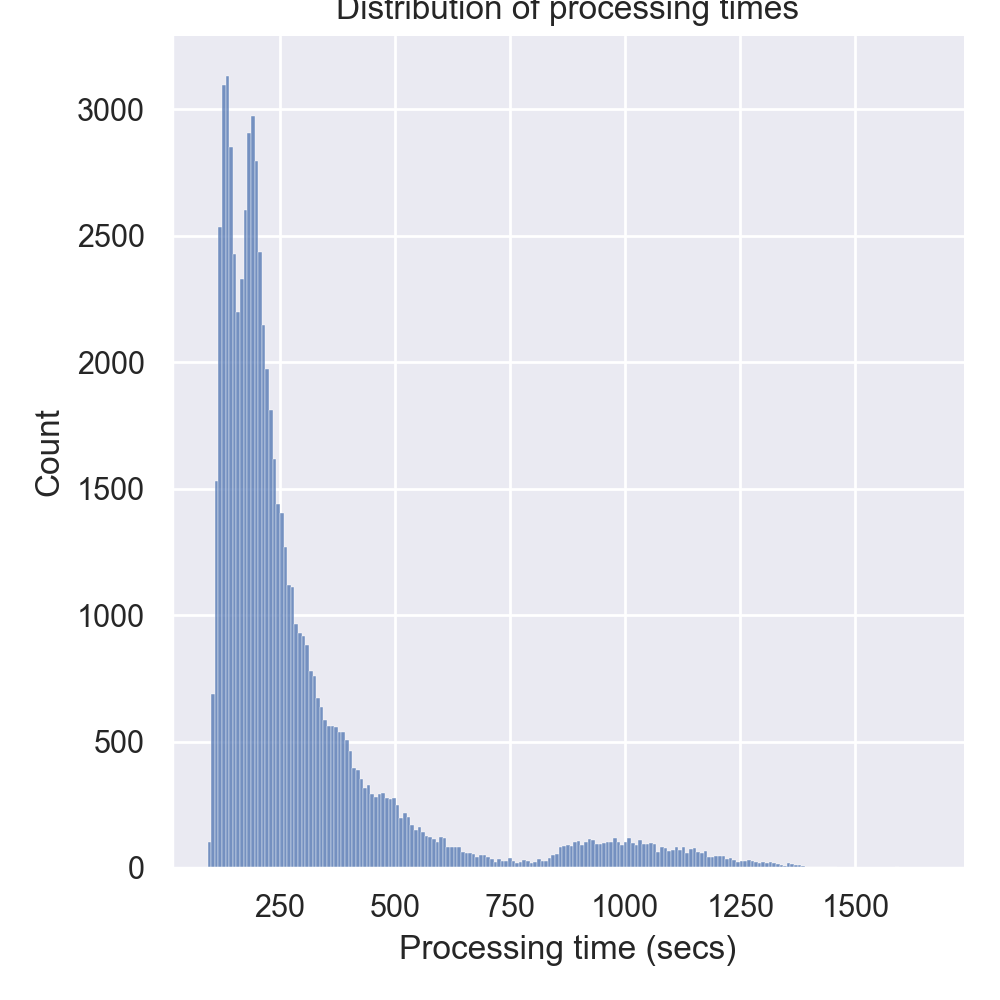

In [17]:
sns.displot(timings, x='eval_duration_secs').set(title='Distribution of processing times',
                                                xlabel='Processing time (secs)')

In [18]:
plt.savefig('hicomb_processing_time_hist.png')

In [19]:
plt.savefig('hicomb_processing_time_hist.pdf')

In [21]:
timings.eval_duration_secs.describe()

count    71099.000000
mean       296.250807
std        231.702201
min         93.288243
25%        161.131971
50%        214.553956
75%        324.758432
max       1657.746921
Name: eval_duration_secs, dtype: float64